# Cleaning all NaN values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [2]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

Drop all NaN values except column Trip_Price

In [3]:
df = df.dropna(subset=df.columns.difference(["Trip_Price"]))

df.isna().sum()

Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price               26
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       588 non-null    float64
 1   Time_of_Day            588 non-null    object 
 2   Day_of_Week            588 non-null    object 
 3   Passenger_Count        588 non-null    float64
 4   Traffic_Conditions     588 non-null    object 
 5   Weather                588 non-null    object 
 6   Base_Fare              588 non-null    float64
 7   Per_Km_Rate            588 non-null    float64
 8   Per_Minute_Rate        588 non-null    float64
 9   Trip_Duration_Minutes  588 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 55.1+ KB


# Drop outliers on features but not on target Trip_Price

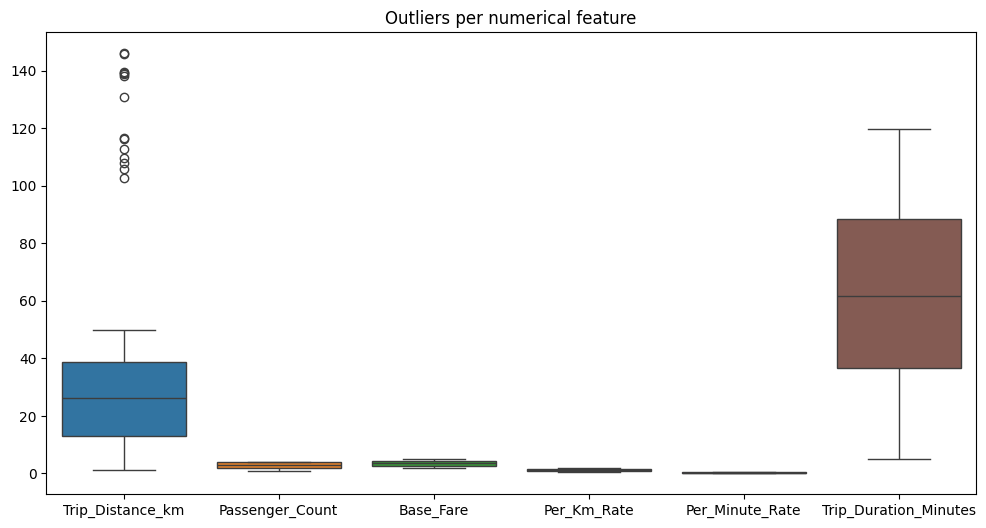

In [5]:
num_cols = df.select_dtypes(include="number").columns
num_cols = num_cols.drop("Trip_Price")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Outliers per numerical feature")
plt.show()

Dropping outliers on numerical features

In [6]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower) &
        (df_clean[col] <= upper)
    ]

print("Before:", df.shape)
print("After:", df_clean.shape)

print("Rows removed:", df.shape[0] - df_clean.shape[0])

Before: (588, 11)
After: (574, 11)
Rows removed: 14


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       574 non-null    float64
 1   Time_of_Day            574 non-null    object 
 2   Day_of_Week            574 non-null    object 
 3   Passenger_Count        574 non-null    float64
 4   Traffic_Conditions     574 non-null    object 
 5   Weather                574 non-null    object 
 6   Base_Fare              574 non-null    float64
 7   Per_Km_Rate            574 non-null    float64
 8   Per_Minute_Rate        574 non-null    float64
 9   Trip_Duration_Minutes  574 non-null    float64
 10  Trip_Price             548 non-null    float64
dtypes: float64(7), object(4)
memory usage: 53.8+ KB


# Save to file

In [9]:
df_clean.to_csv("../data/taxi_cleaned.csv", index=False)